In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

# Quiz 2 - Get Hyp'

<ul>
<li> Use this as a starting point for your work, but answer the questions on Moodle. 
<li> Publish this to your GitHub and submit the link in the question on Moodle. 
</ul>

## Potentially Useful Information

#### Data Dictionary
<ul>
<li>credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
<li>purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
<li>int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
<li>installment: The monthly installments owed by the borrower if the loan is funded.
<li>log.annual.inc: The natural log of the self-reported annual income of the borrower.
<li>dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
<li>fico: The FICO credit score of the borrower.
<li>days.with.cr.line: The number of days the borrower has had a credit line.
<li>revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
<li>revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
<li>inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
<li>not.fully.paid: 1 if the borrower failed to repay their loan, 0 if they have not failed
</ul>

#### FICO Score Groups

![FICO](fico_range.png "FICO Ranges")

#### Note on ANOVA - Might be Useful, Might Not

> @JeremyMiles is right. First, there's a rule of thumb that the ANOVA is robust to heterogeneity of variance so long as the largest variance is not more than 4 times the smallest variance. Furthermore, the general effect of heterogeneity of variance is to make the ANOVA less efficient. That is, you would have lower power. Since you have a significant effect anyway, there is less reason to be concerned here. 
- https://stats.stackexchange.com/questions/56971/alternative-to-one-way-anova-unequal-variance

In [2]:
# Please don't alter this part. 
df = pd.read_csv("loan_data.csv")
df.drop(columns={"delinq.2yrs", "pub.rec"}, inplace=True)
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,0


### Visualize/Explore Data - If You Want, You Do You

In [10]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,1.000000


In [15]:
df['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [16]:
n = df[df["credit.policy"]==0]
p = df[df["credit.policy"]==1]
n = n["fico"]
p = p["fico"]

In [17]:
nMean, pMean, nCount, pCount = n.mean(), p.mean(), n.count(), p.count()
nMean, pMean, nCount, pCount

(683.978051391863, 717.3560311284047, 1868, 7710)

In [18]:
#Scipy ttest:
stat, pval = ss.ttest_ind(n, p)
pval

2.6100416830751396e-271

## Solutions

<AxesSubplot: xlabel='credit.policy', ylabel='fico'>

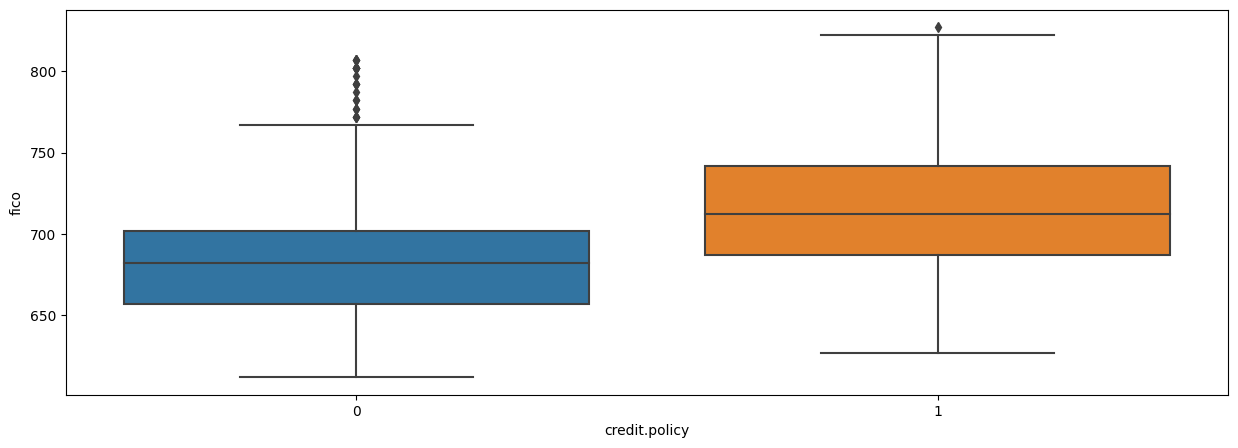

In [19]:
#Make a boxplot to demonstrate. 
sns.boxplot(data=df, x="credit.policy", y="fico")

In [ ]:
#Make a boxplot to demonstrate. 
sns.boxplot(data=df, x="credit.policy", y="fico")

In [21]:
#First, test for vars being equal-ish
varStat, varP = ss.levene(df['fico'][df['credit.policy'] == 0],
               df['fico'][df['credit.policy'] == 1],
               df['fico'][df['not.fully.paid'] == 0],
               df['fico'][df['not.fully.paid'] == 1])
varP

2.2586739173890243e-36

In [22]:
n2 = df[df["credit.policy"]==0]
p2 = df[df["credit.policy"]==1]
n2 = n2["log.annual.inc"]
p2 = p2["log.annual.inc"]

In [24]:
n2Mean, p2Mean, n2Count, p2Count = n2.mean(), p2.mean(), n2.count(), p2.count()
n2Mean, p2Mean, n2Count, p2Count

(10.888519880012797, 10.942680001295294, 1868, 7710)

In [23]:
stat, pval = ss.ttest_ind(n2, p2)
pval

0.0006337324172012597

In [25]:
#Statsmodels calculation of power. 
from statsmodels.stats.power import TTestPower
powerTest = TTestPower()
ces = thinkstats2.CohenEffectSize(n2, p2)
alpha = .05
nobs = n2Count + p2Count

pow = powerTest.power(effect_size=ces, nobs=nobs, alpha=alpha)
pow, ces

(1.0, -0.08813984185782714)

In [28]:
n = powerTest.solve_power(ces, power=.85, nobs=None, alpha=alpha)
n

1157.6455504967862

In [30]:
income = np.power(10, df['log.annual.inc']) # what's the data look like before log10
income.mean()

359125655810.6448

In [35]:
dd= df['log.annual.inc'].mean()
dd

10.932117137800155

In [42]:
df['log_return'] = (10, df['log.annual.inc'])

In [49]:
df['income'] = np.exp(df['log.annual.inc'])

In [62]:
df.tail(30)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,not.fully.paid,log_return,income
9548,0,home_improvement,0.1607,87.99,10.778956,14.20,667,4080.000000,1530,36.4,7,1,6.011132e+10,48000.000005
9549,0,home_improvement,0.2164,729.70,11.877569,8.63,667,8280.041667,55442,66.9,9,1,7.543425e+11,144000.000208
9550,0,all_other,0.1459,137.86,10.085809,1.15,732,1230.041667,972,11.3,5,0,1.218454e+10,24000.000016
9551,0,home_improvement,0.1348,508.87,11.736069,16.85,707,7440.041667,206877,92.5,1,1,5.445892e+11,125000.000464
9552,0,debt_consolidation,0.1311,337.45,10.691945,23.62,702,3780.041667,6255,56.9,5,0,4.919771e+10,43999.999872
9553,0,debt_consolidation,0.1385,545.67,11.775290,10.80,697,4110.000000,197716,74.9,4,0,5.960597e+11,130000.000073
9554,0,small_business,0.1533,870.71,11.842229,16.16,707,4230.041667,56909,49.8,5,0,6.953912e+11,138999.999706
9555,0,home_improvement,0.1311,674.90,12.292250,9.94,717,5730.041667,39576,27.7,5,1,1.959974e+12,217999.999614
9556,0,debt_consolidation,0.1385,136.42,11.002100,18.18,677,3423.041667,15301,85.0,4,0,1.004847e+11,59999.999928
9557,0,credit_card,0.1025,466.35,12.206073,13.97,722,6120.041667,338935,78.3,2,0,1.607210e+12,200000.000894


In [51]:
df.income.mean()

68402.03071015503

c:\Users\toluw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='income', ylabel='Density'>

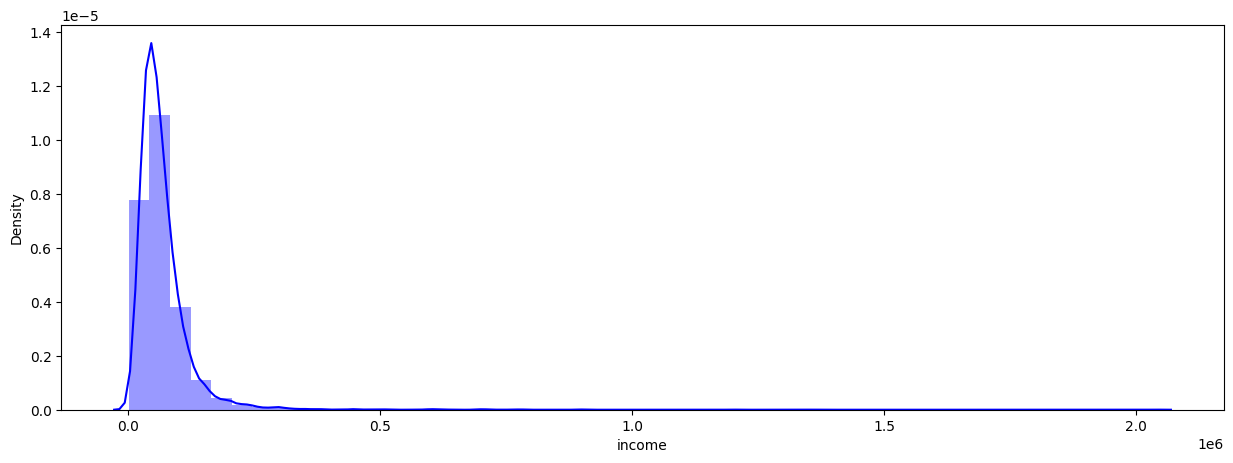

In [53]:
sns.distplot(df.income, color="blue")


c:\Users\toluw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='days.with.cr.line', ylabel='Density'>

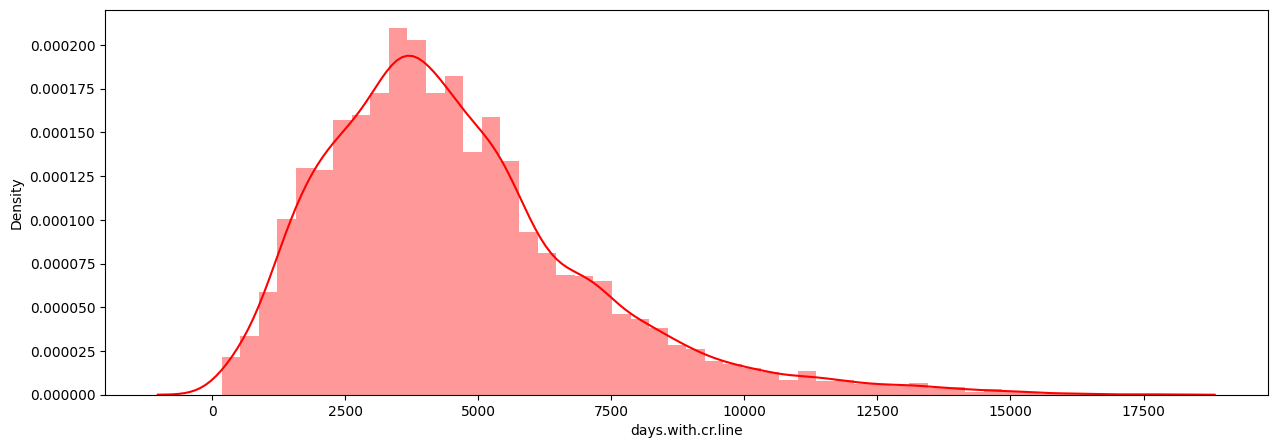

In [54]:
sns.distplot(df['days.with.cr.line'], color="red")


c:\Users\toluw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='fico', ylabel='Density'>

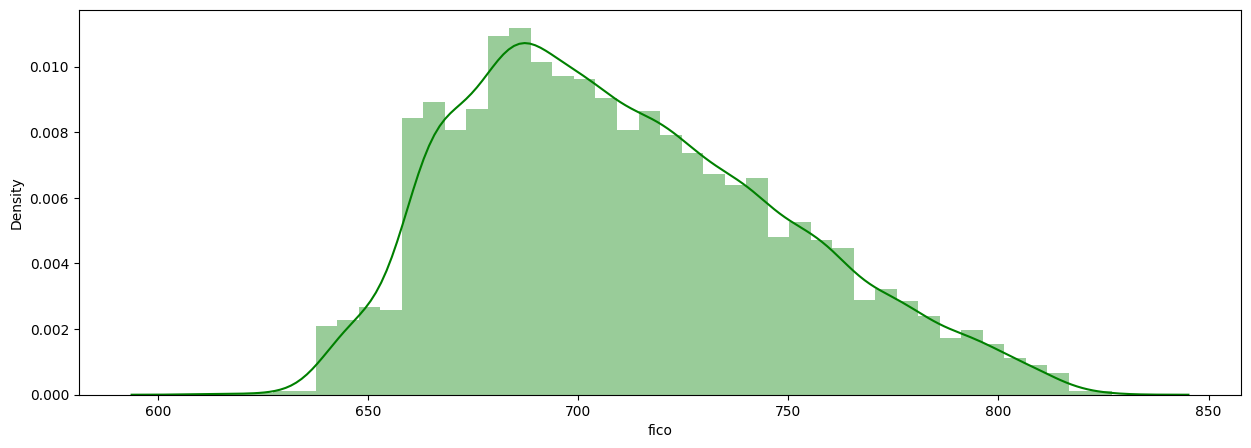

In [55]:
sns.distplot(df['fico'], color="green")


In [59]:
df.income.median()

55763.99997288616

In [58]:
df.income.mean()

68402.03071015503

In [60]:
(df.fico.mean(),df.fico.median())

(710.8463144706619, 707.0)

In [61]:
(df['days.with.cr.line'].mean(),df['days.with.cr.line'].median())

(4560.7671965292075, 4139.958333)

In [72]:
#Remove some high VIF columns
df_2 = df.drop(columns={"purpose", "installment", "dti", "days.with.cr.line","revol.bal","inq.last.6mths","not.fully.paid"})

In [75]:
df_2.head()

,credit.policy,int.rate,log.annual.inc,fico,revol.util,log_return,income
0,1,0.1189,11.350407,737,52.1,2.240818e+11,85000.000385
1,1,0.1071,11.082143,707,76.7,1.208210e+11,65000.000073
2,1,0.1357,10.373491,682,25.6,2.363149e+10,31999.999943
3,1,0.1008,11.350407,712,73.2,2.240818e+11,85000.000385
4,1,0.1426,11.299732,667,39.5,1.994033e+11,80799.999636


In [76]:
df2 = df_2.drop(columns={"credit.policy", "log_return", "income"})

In [77]:
df2.head()

,int.rate,log.annual.inc,fico,revol.util
0,0.1189,11.350407,737,52.1
1,0.1071,11.082143,707,76.7
2,0.1357,10.373491,682,25.6
3,0.1008,11.350407,712,73.2
4,0.1426,11.299732,667,39.5


In [78]:
#Statsmodels.
import statsmodels.api as sm

In [83]:
y =df["fico"]
df_3 = df[["revol.util"]]
X2 = sm.add_constant(df_3)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   fico   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     3968.
Date:                Sat, 12 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:49:16   Log-Likelihood:                -46763.
No. Observations:                9578   AIC:                         9.353e+04
Df Residuals:                    9576   BIC:                         9.354e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        743.9977      0.619   1201.602      0.0